## Google Play Store Data Analysis

## Data Loading And Initial Exploration

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Data Loading

In [114]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')

In [115]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1088,Bank of Brazil,FINANCE,4.5,1336246,39M,"10,000,000+",Free,0,Everyone,Finance,"August 3, 2018",6.39.1.4,4.1 and up
9724,EP Gem Hunter,GAME,4.6,79,31M,"1,000+",Free,0,Everyone 10+,Action,"January 17, 2016",1.1.0,2.3 and up
9632,Keyboard ManMan,TOOLS,4.4,121304,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"March 11, 2018",Varies with device,Varies with device
7360,FlashLight HD LED Pro,TOOLS,4.7,4928,Varies with device,"50,000+",Paid,$2.99,Everyone,Tools,"July 28, 2018",Varies with device,Varies with device
4147,Gboard - the Google Keyboard,TOOLS,4.2,1855262,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device


### Describe the Columns

In [116]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Checking Info about Dataset

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Checing the Unique Value

In [118]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [119]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Checking the Duplicates Value

In [120]:
print(df.duplicated().sum())

483


### Dropping all duplicates

In [121]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Checking the Null Values

In [122]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [123]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'''{col} of type '{df[col].dtype}' has 
        {df[col].isnull().sum()}/{df.shape[0]} null values with 
        {round(((df[col].isnull().sum())/(df.shape[0])*100),3)}%''')

Rating of type 'float64' has 
        1465/10358 null values with 
        14.144%
Type of type 'object' has 
        1/10358 null values with 
        0.01%
Content Rating of type 'object' has 
        1/10358 null values with 
        0.01%
Current Ver of type 'object' has 
        8/10358 null values with 
        0.077%
Android Ver of type 'object' has 
        3/10358 null values with 
        0.029%


### Filling the Null Values

In [124]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

### Drop null values in specified columns

In [125]:
columns_drop = ['Current Ver', 'Content Rating', 'Android Ver', 'Type']
df.dropna(subset=columns_drop, inplace=True)

In [126]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [127]:
df.drop('Genres', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Last Updated    10346 non-null  object 
 10  Current Ver     10346 non-null  object 
 11  Android Ver     10346 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.0+ MB


### Change the Datatype

In [128]:
df['Reviews'] = df['Reviews'].astype('int64')
df['Last Updated'] = pd.to_datetime(df['Last Updated'])


### Clean the Price column and Convert to float64

In [129]:
# Clean the 'Price' column and convert to float64
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype('float64')



In [130]:
df['Avg_Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df['Avg_Installs'] = df['Avg_Installs'].astype('int64')

In [131]:
df['AvgInstalls'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  int64         
 4   Size            10346 non-null  object        
 5   Installs        10346 non-null  object        
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Last Updated    10346 non-null  datetime64[ns]
 10  Current Ver     10346 non-null  object        
 11  Android Ver     10346 non-null  object        
 12  Avg_Installs    10346 non-null  int64         
 13  AvgInstalls     10346 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memor

## EXPLORATORY DATA ANALYSIS

### What is the average rating of apps in the dataset?

In [133]:
avg_rating = df['Rating'].mean() 
median_rating = df['Rating'].median()
std_rating = df['Rating'].std()
total_apps = len(df)
apps_with_ratings = df['Rating'].notna().sum()
apps_without_ratings = df['Rating'].isna().sum()

print(f"Total Apps: {total_apps:,}")
print(f"Apps with Ratings: {apps_with_ratings:,}")
print(f"Apps without Ratings: {apps_without_ratings:,}")
print(f"Average Rating: {avg_rating:.2f}")




Total Apps: 10,346
Apps with Ratings: 10,346
Apps without Ratings: 0
Average Rating: 4.19


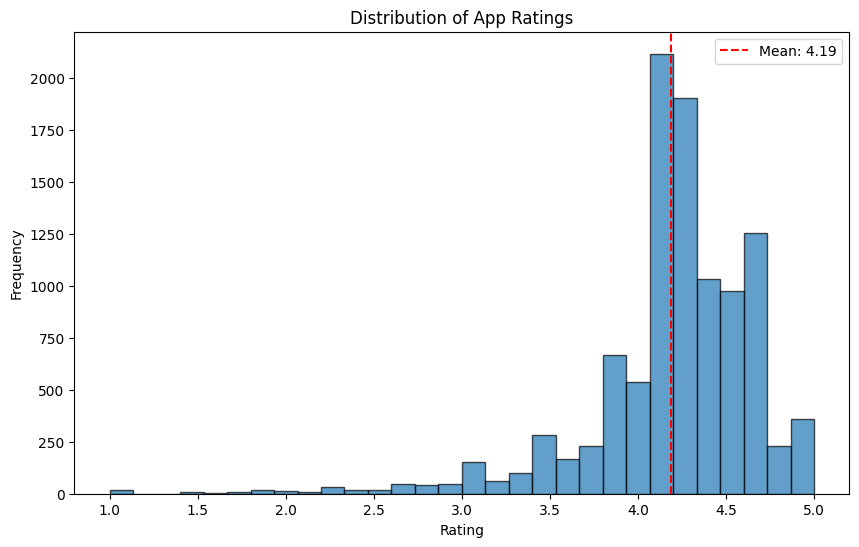

In [134]:
# Rating distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["Rating"].mean():.2f}')
plt.legend()
plt.show()


### How many unique categories of apps are there?

In [135]:
# Get number of unique categories
unique_categories = df['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")





Number of unique categories: 33


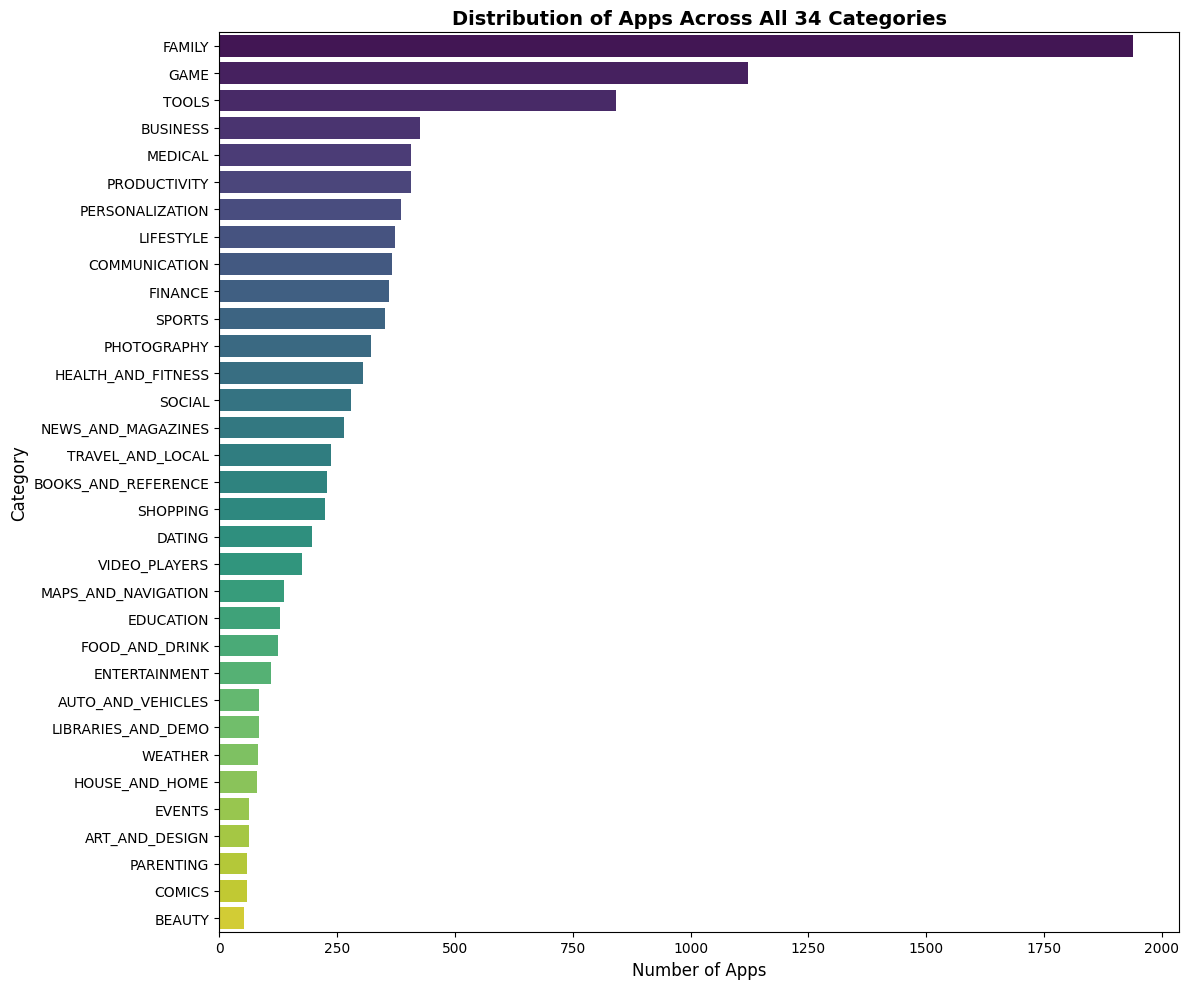

In [136]:
# Horizontal bar chart for all categories
plt.figure(figsize=(12, 10))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Distribution of Apps Across All 34 Categories', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### What is the distribution of app sizes?

In [137]:
# Clean and convert Size to numeric (MB)
def convert_size_to_mb(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

# Apply conversion
df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# Display statistics
print("\nSize Statistics (in MB):")
print(df['Size_MB'].describe())
print(f"\nMedian Size: {df['Size_MB'].median():.2f} MB")
print(f"Number of apps with size data: {df['Size_MB'].notna().sum()}")



Size Statistics (in MB):
count    8821.000000
mean       21.306240
std        22.545826
min         0.008301
25%         4.700000
50%        13.000000
75%        29.000000
max       100.000000
Name: Size_MB, dtype: float64

Median Size: 13.00 MB
Number of apps with size data: 8821


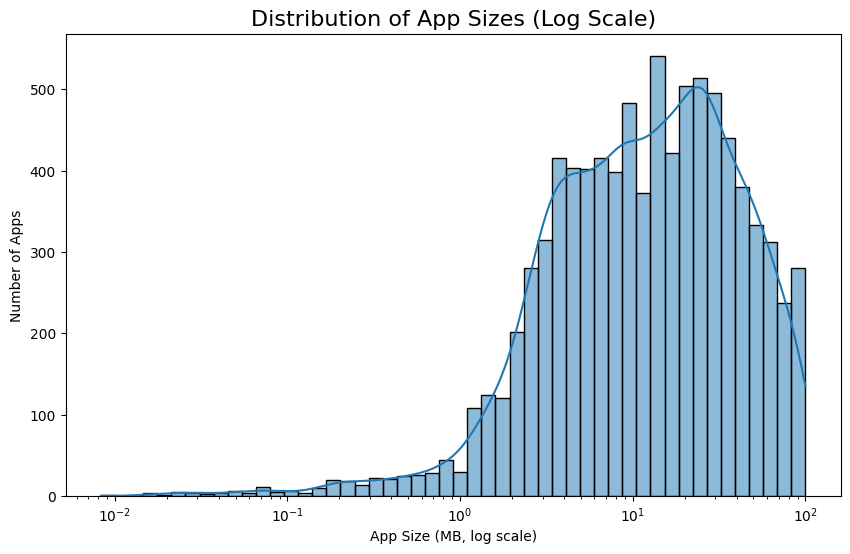

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_MB'].dropna(), bins=50, kde=True, log_scale=True)
plt.title('Distribution of App Sizes (Log Scale)', fontsize=16)
plt.xlabel('App Size (MB, log scale)')
plt.ylabel('Number of Apps')
plt.show()


### How many free vs paid apps are there?

Type
Free    9584
Paid     762
Name: count, dtype: int64


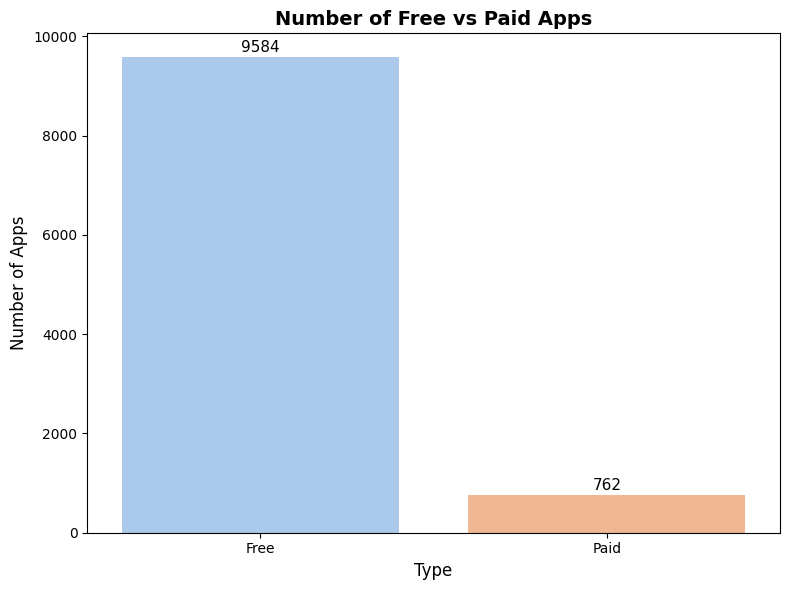

In [139]:
type_counts = df['Type'].value_counts()
print(type_counts)

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='pastel')
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.title('Number of Free vs Paid Apps', fontsize=14, fontweight='bold')
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 100, str(v), ha='center', fontsize=11)
plt.tight_layout()
plt.show()

### What is the most common content rating for apps?

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


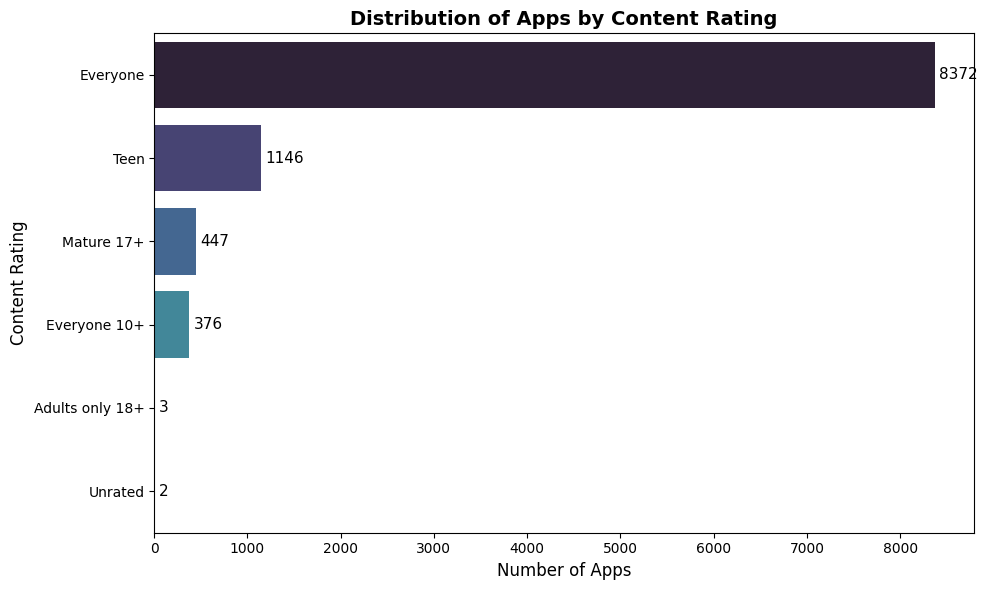

In [140]:
# Count content rating values
content_counts = df['Content Rating'].value_counts()
print(content_counts)

# Bar chart for content rating
plt.figure(figsize=(10, 6))
sns.barplot(x=content_counts.values, y=content_counts.index, palette='mako')
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Content Rating', fontsize=12)
plt.title('Distribution of Apps by Content Rating', fontsize=14, fontweight='bold')
for i, v in enumerate(content_counts.values):
    plt.text(v + 50, i, str(v), va='center', fontsize=11)
plt.tight_layout()
plt.show()


### What are the top 5 most installed apps?

In [141]:
# Sort by AvgInstalls and display top 5
top5_installed = df.sort_values('AvgInstalls', ascending=False)[['App', 'Category', 'AvgInstalls']].head(5)
print(top5_installed) 


                            App            Category  AvgInstalls
336          WhatsApp Messenger       COMMUNICATION   1000000000
2554                    Google+              SOCIAL   1000000000
3127         Google Street View    TRAVEL_AND_LOCAL   1000000000
3816                Google News  NEWS_AND_MAGAZINES   1000000000
3223  Maps - Navigate & Explore    TRAVEL_AND_LOCAL   1000000000


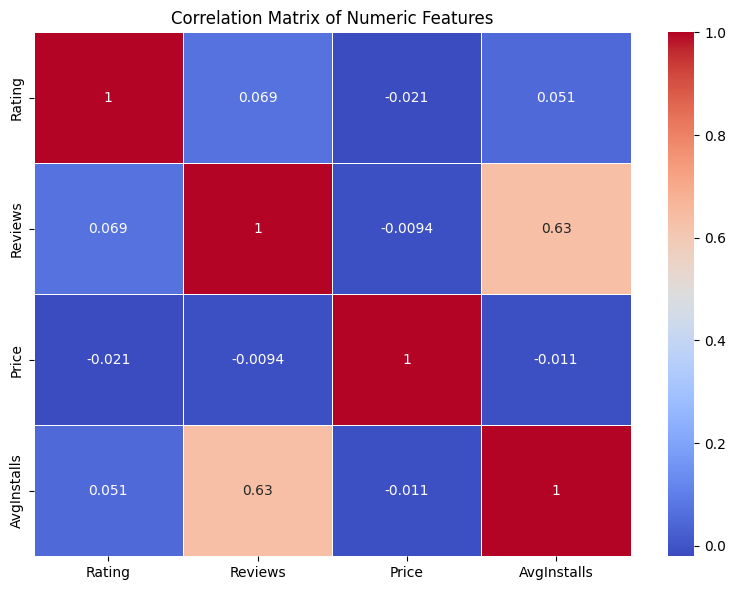

In [142]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = df[['Rating', 'Reviews', 'Price', 'AvgInstalls']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

### How many apps have a rating of 4.0 and above?

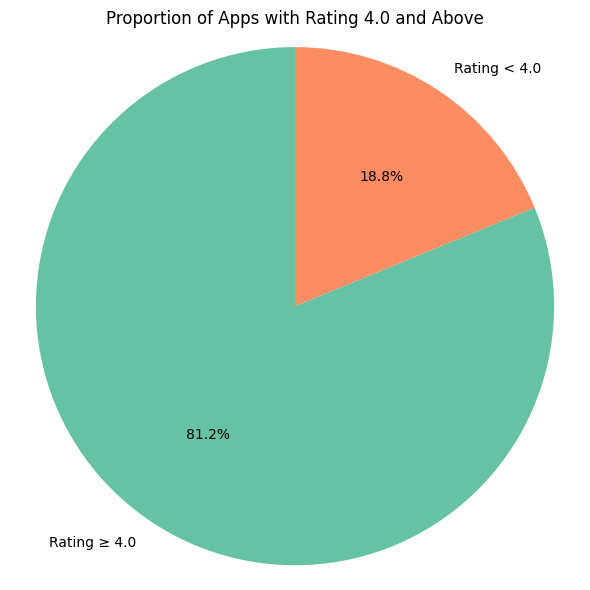

In [143]:
# Count apps with rating >= 4.0 and < 4.0
high_rating_count = (df['Rating'] >= 4.0).sum()
low_rating_count = (df['Rating'] < 4.0).sum()

# Pie chart for proportion of high vs low rated apps
plt.figure(figsize=(6, 6))
plt.pie([high_rating_count, low_rating_count], labels=['Rating ≥ 4.0', 'Rating < 4.0'],
        autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Proportion of Apps with Rating 4.0 and Above')
plt.axis('equal')
plt.tight_layout()
plt.show()


### What is the average number of reviews for free vs paid apps?

Type
Free    437690.492487
Paid     11946.864829
Name: Reviews, dtype: float64


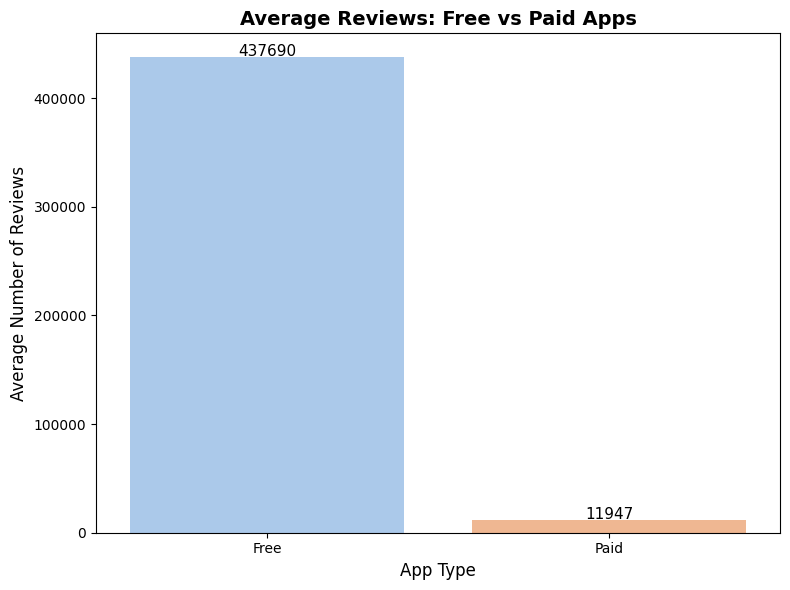

In [144]:
# Convert Reviews column to int if not already
df['Reviews'] = df['Reviews'].astype(int)

# Calculate average reviews for Free and Paid apps
avg_reviews_by_type = df.groupby('Type')['Reviews'].mean()
print(avg_reviews_by_type)

# Bar plot for average reviews by app type
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_reviews_by_type.index, y=avg_reviews_by_type.values, palette='pastel')
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Average Number of Reviews', fontsize=12)
plt.title('Average Reviews: Free vs Paid Apps', fontsize=14, fontweight='bold')
for i, v in enumerate(avg_reviews_by_type.values):
    plt.text(i, v + 1000, f"{v:.0f}", ha='center', fontsize=11)
plt.tight_layout()
plt.show()


### What is the average app size for each category ?

Category
GAME                   44.126816
FAMILY                 27.964800
TRAVEL_AND_LOCAL       24.515960
SPORTS                 24.180992
ENTERTAINMENT          22.638806
PARENTING              22.512963
FOOD_AND_DRINK         22.056122
HEALTH_AND_FITNESS     21.642819
EDUCATION              20.076632
AUTO_AND_VEHICLES      20.036807
MEDICAL                19.383059
FINANCE                17.937470
SOCIAL                 16.875621
PHOTOGRAPHY            16.831950
MAPS_AND_NAVIGATION    16.614368
VIDEO_PLAYERS          16.084441
HOUSE_AND_HOME         15.970010
SHOPPING               15.897718
DATING                 15.825941
LIFESTYLE              14.856415
EVENTS                 13.963617
BUSINESS               13.912536
BEAUTY                 13.795745
COMICS                 13.484869
BOOKS_AND_REFERENCE    13.253664
WEATHER                13.124006
PRODUCTIVITY           12.871599
NEWS_AND_MAGAZINES     12.646415
ART_AND_DESIGN         12.529508
COMMUNICATION          11.657320
P

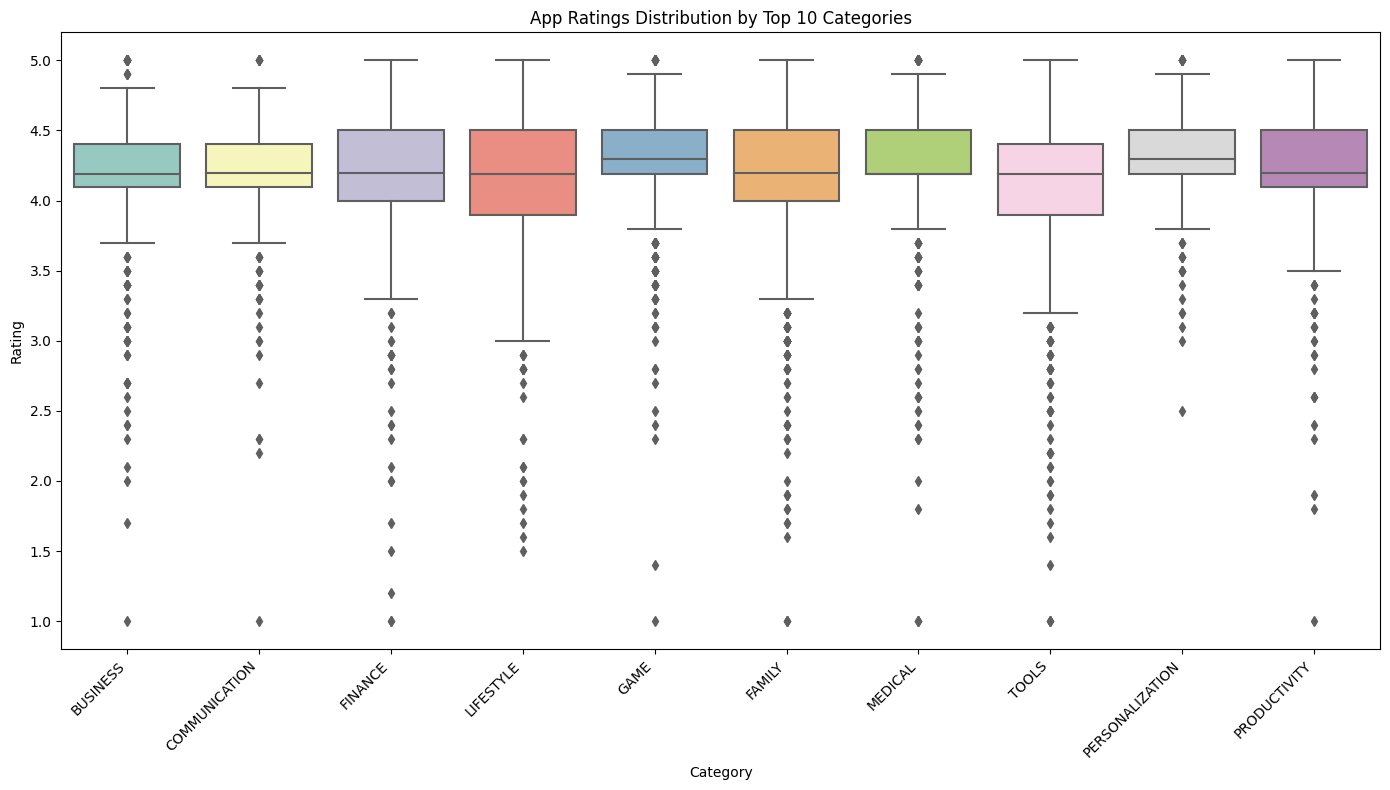

In [145]:
# Function to convert Size to MB (reuse if already defined)
def convert_size_to_mb(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024
    else:
        return np.nan

# Create Size_MB column if not exists
df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# Calculate average size by category, drop NaNs
avg_size_by_category = df.groupby('Category')['Size_MB'].mean().dropna().sort_values(ascending=False)

print(avg_size_by_category)

plt.figure(figsize=(14, 8))
top_categories = df['Category'].value_counts().head(10).index
sns.boxplot(x='Category', y='Rating', data=df[df['Category'].isin(top_categories)], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('App Ratings Distribution by Top 10 Categories')
plt.tight_layout()
plt.show()


### How many apps were last updated in 2018?

Number of apps last updated in 2018: 6929


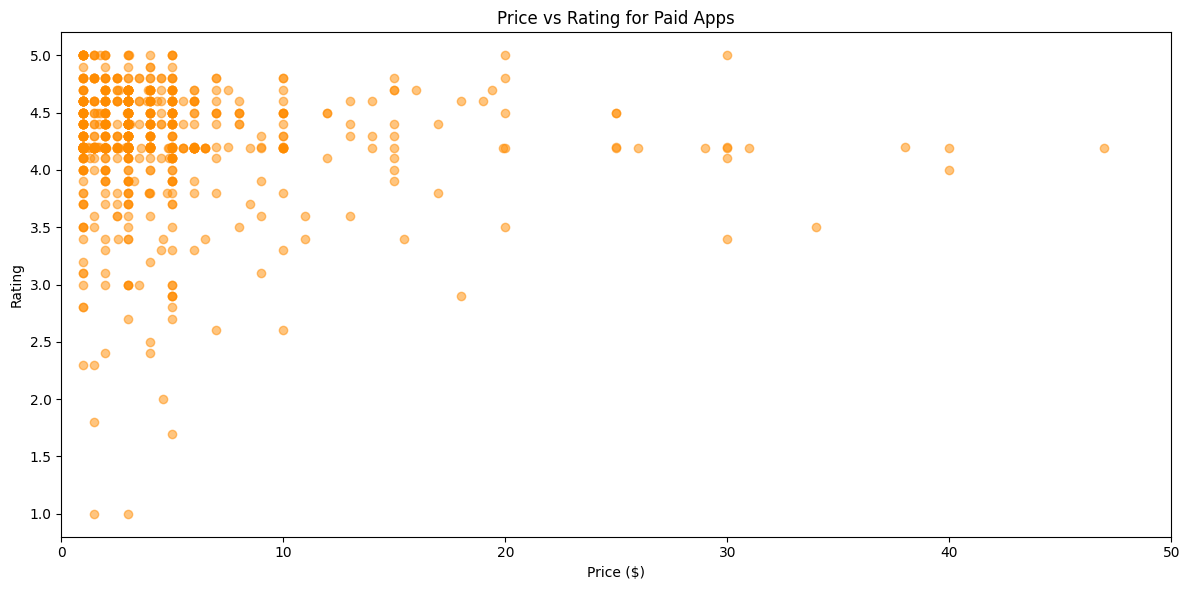

In [146]:
# Convert 'Last Updated' to datetime if not already
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Filter apps last updated in 2018
apps_updated_2018 = df[df['Last Updated'].dt.year == 2018]
count_2018 = apps_updated_2018.shape[0]
print("Number of apps last updated in 2018:", count_2018)

paid_apps = df[df['Type'] == 'Paid']
plt.figure(figsize=(12, 6))
plt.scatter(paid_apps['Price'], paid_apps['Rating'], alpha=0.5, color='darkorange')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.title('Price vs Rating for Paid Apps')
plt.xlim(0, 50)
plt.tight_layout()
plt.show()


## Medium-Level Questions:

###  What is the correlation between the number of installs and the app rating?


Correlation between number of installs and app rating: 0.05


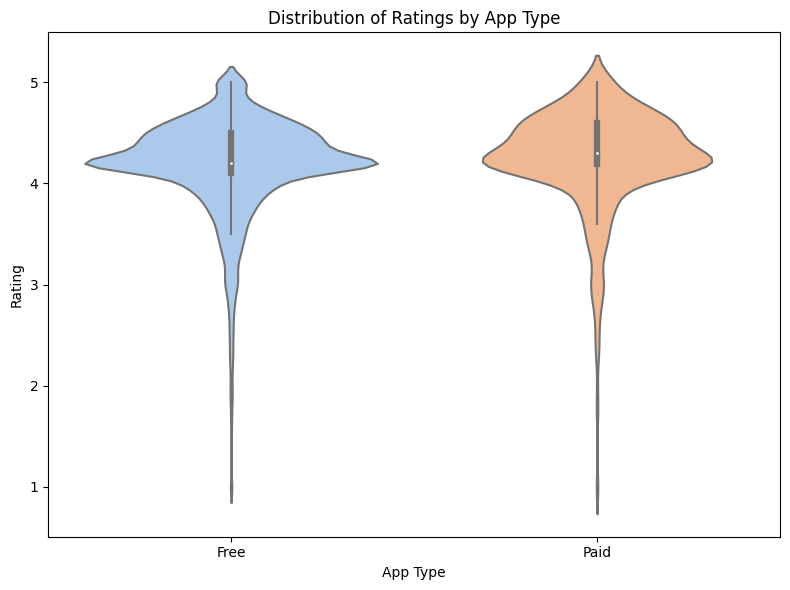

In [147]:
# Calculate correlation between AvgInstalls and Rating
correlation = df['AvgInstalls'].corr(df['Rating'])
print(f"Correlation between number of installs and app rating: {correlation:.2f}")

plt.figure(figsize=(8, 6))
sns.violinplot(x='Type', y='Rating', data=df, palette='pastel')
plt.title('Distribution of Ratings by App Type')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()



### Which app categories have the highest average rating?

Category
EDUCATION              4.374535
ART_AND_DESIGN         4.368260
EVENTS                 4.362520
BOOKS_AND_REFERENCE    4.311599
PERSONALIZATION        4.304104
PARENTING              4.281590
GAME                   4.277438
BEAUTY                 4.260094
HEALTH_AND_FITNESS     4.251111
SOCIAL                 4.246513
Name: Rating, dtype: float64


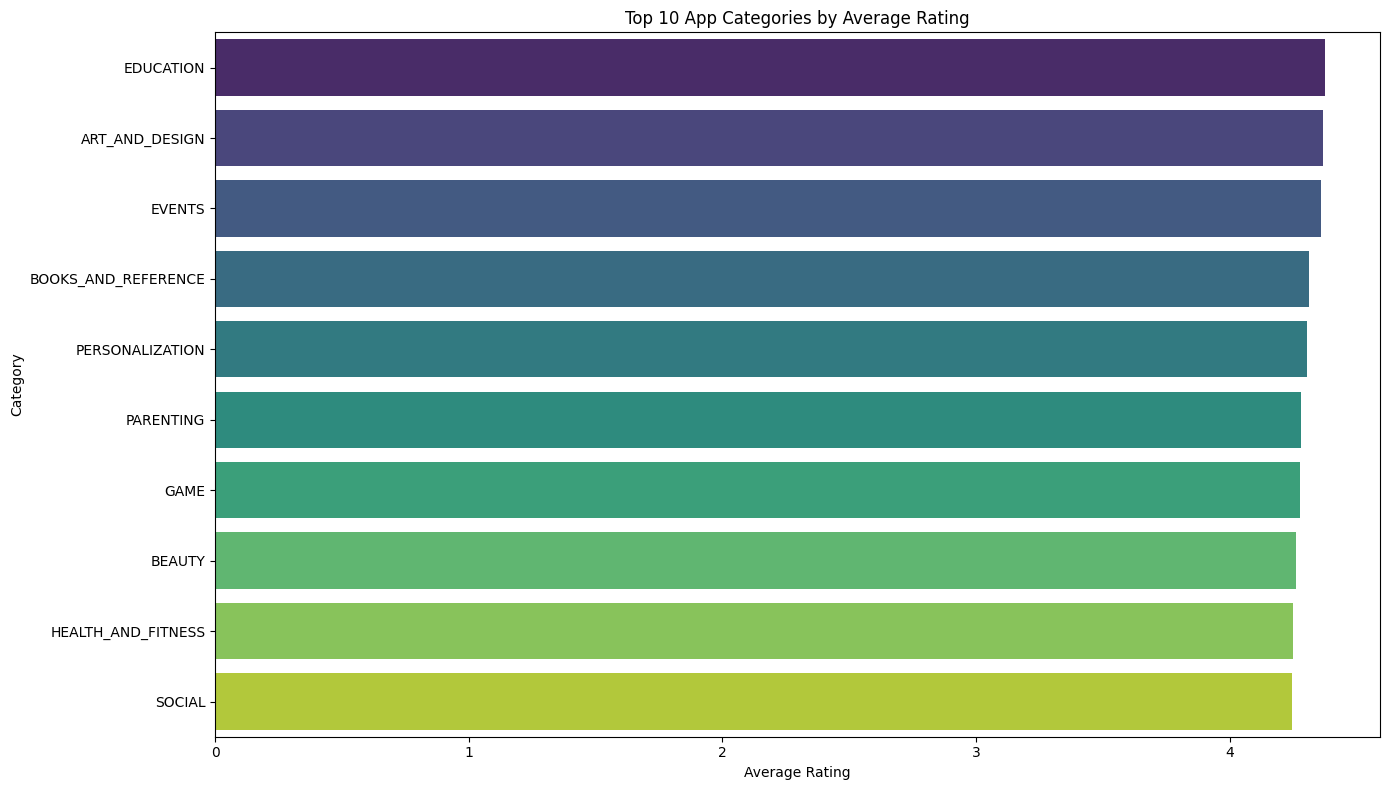

In [148]:
# Calculate average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Display top 10 categories
print(avg_rating_by_category.head(10))

# Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x=avg_rating_by_category.head(10).values, y=avg_rating_by_category.head(10).index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top 10 App Categories by Average Rating')
plt.tight_layout()
plt.show()


### How does the price of an app affect its average rating?


Correlation between Price and Rating: -0.02


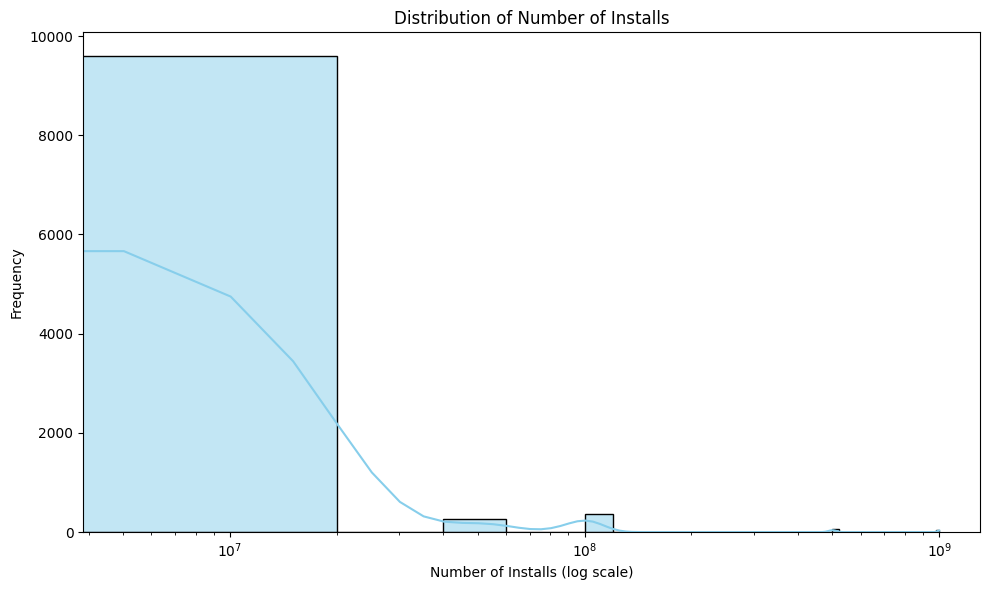

In [149]:
# Calculate correlation between Price and Rating
corr_price_rating = df['Price'].corr(df['Rating'])
print(f"Correlation between Price and Rating: {corr_price_rating:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(df['AvgInstalls'], bins=50, kde=True, color='skyblue')
plt.xscale('log')
plt.xlabel('Number of Installs (log scale)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Installs')
plt.tight_layout()
plt.show()


### What is the distribution of app ratings across different content ratings?

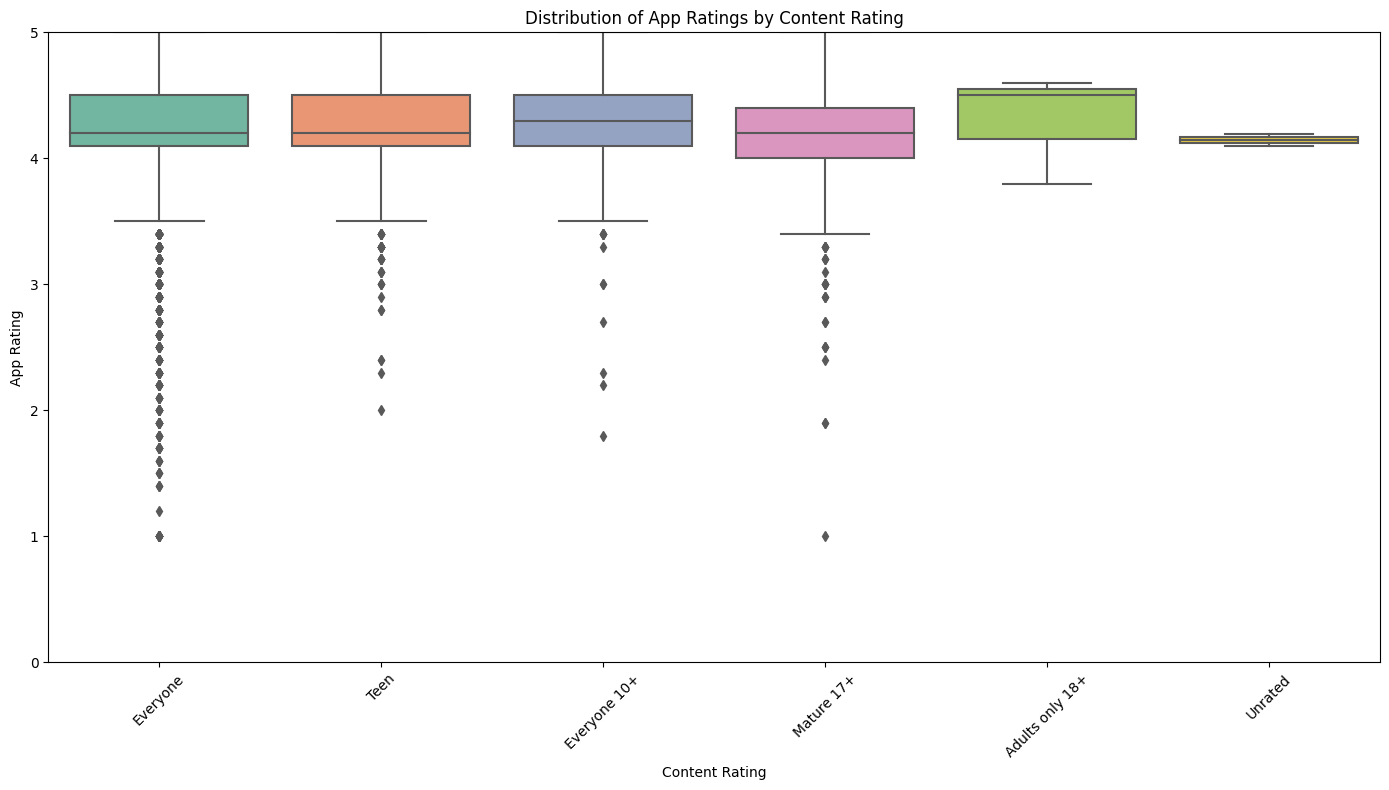

In [150]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Content Rating', y='Rating', data=df, palette='Set2')
plt.title('Distribution of App Ratings by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('App Rating')
plt.ylim(0, 5)  # Ratings usually between 0 and 5
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Which genres have the most apps with over 1 million installs?

Category
GAME               550
FAMILY             362
TOOLS              188
PHOTOGRAPHY        161
COMMUNICATION      146
PRODUCTIVITY       124
SOCIAL             107
SPORTS              97
SHOPPING            91
PERSONALIZATION     76
Name: count, dtype: int64


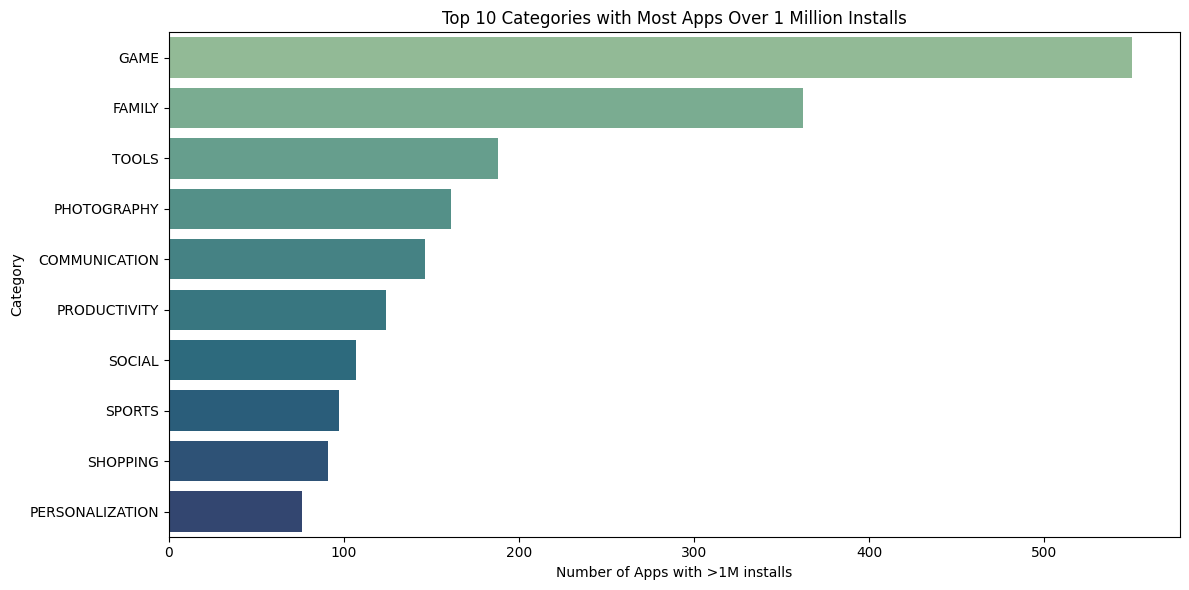

In [151]:
# Filter apps with more than 1 million installs
high_installs = df[df['AvgInstalls'] > 1_000_000]

# Count apps by category
top_categories_high_installs = high_installs['Category'].value_counts().head(10)
print(top_categories_high_installs)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories_high_installs.values, y=top_categories_high_installs.index, palette='crest')
plt.xlabel('Number of Apps with >1M installs')
plt.ylabel('Category')
plt.title('Top 10 Categories with Most Apps Over 1 Million Installs')
plt.tight_layout()
plt.show()


### How frequently do apps get updated? Calculate the average time between updates.

Average days since last update: 2919.38 days


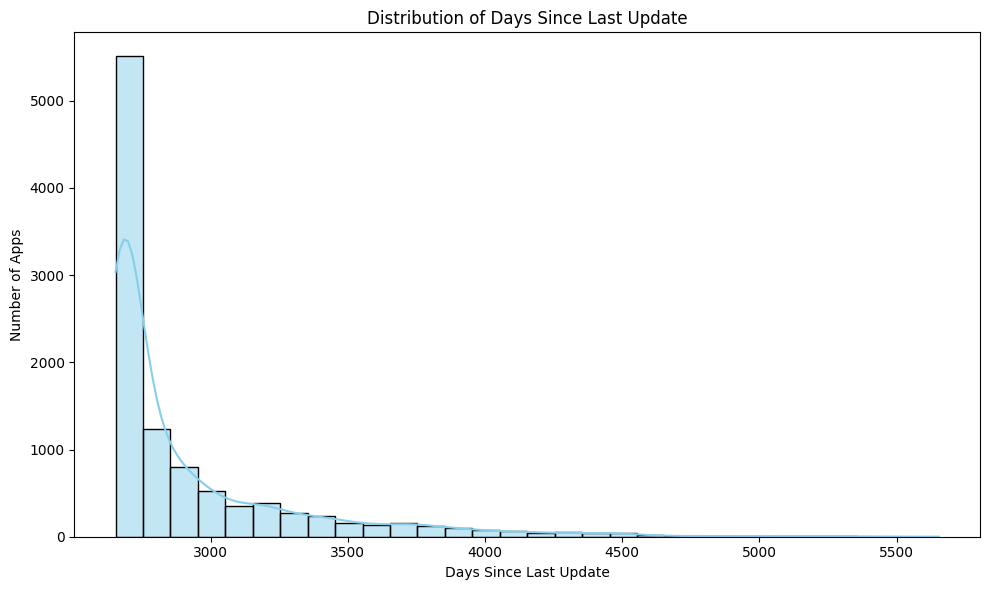

In [152]:
from datetime import datetime

# Convert 'Last Updated' to datetime if not already
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Calculate days since last update from today
today = pd.to_datetime(datetime.now())
df['Days Since Last Update'] = (today - df['Last Updated']).dt.days

# Average days since last update
avg_days_since_update = df['Days Since Last Update'].mean()
print(f"Average days since last update: {avg_days_since_update:.2f} days")

# Visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Days Since Last Update'], bins=30, kde=True, color='skyblue')
plt.xlabel('Days Since Last Update')
plt.ylabel('Number of Apps')
plt.title('Distribution of Days Since Last Update')
plt.tight_layout()
plt.show()


### What is the impact of app size on the number of installs?


Correlation between app size and number of installs: 0.17


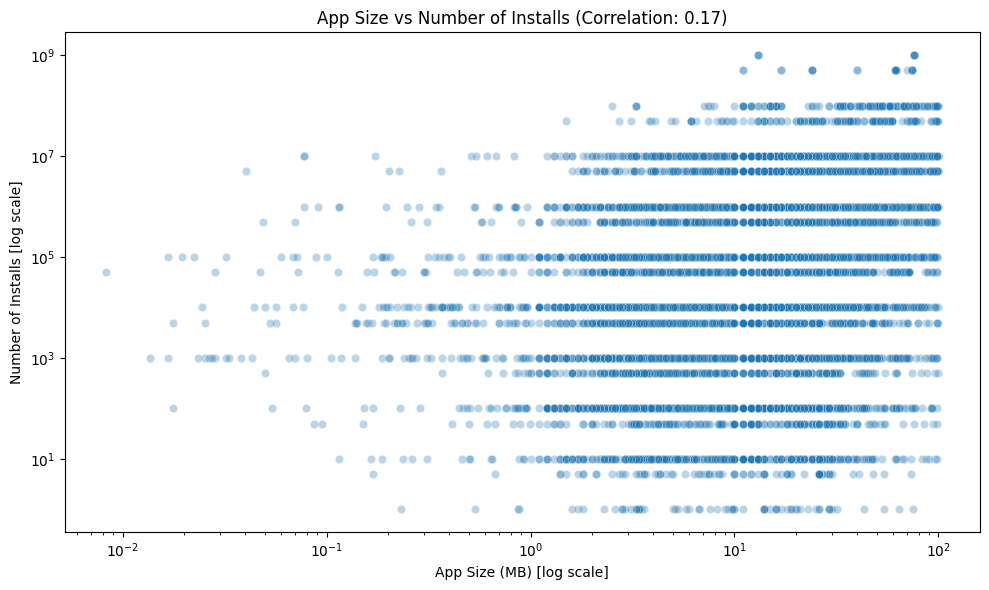

In [153]:
# Calculate correlation between Size_MB and AvgInstalls
correlation_size_installs = df['Size_MB'].corr(df['AvgInstalls'])
print(f"Correlation between app size and number of installs: {correlation_size_installs:.2f}")

# Scatter plot with log scales to show relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_MB', y='AvgInstalls', data=df, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('App Size (MB) [log scale]')
plt.ylabel('Number of Installs [log scale]')
plt.title(f'App Size vs Number of Installs (Correlation: {correlation_size_installs:.2f})')
plt.tight_layout()
plt.show()


### Which apps have the highest number of reviews, and what are their ratings?

In [154]:
# Convert Reviews to int if not already
df['Reviews'] = df['Reviews'].astype(int)

# Get top 5 apps by number of reviews
top_reviewed_apps = df.sort_values('Reviews', ascending=False)[['App', 'Reviews', 'Rating']].head(5)
print(top_reviewed_apps)



                     App   Reviews  Rating
2544            Facebook  78158306     4.1
3943            Facebook  78128208     4.1
336   WhatsApp Messenger  69119316     4.4
3904  WhatsApp Messenger  69109672     4.4
2604           Instagram  66577446     4.5


### How does the content rating distribution differ between free and paid apps?

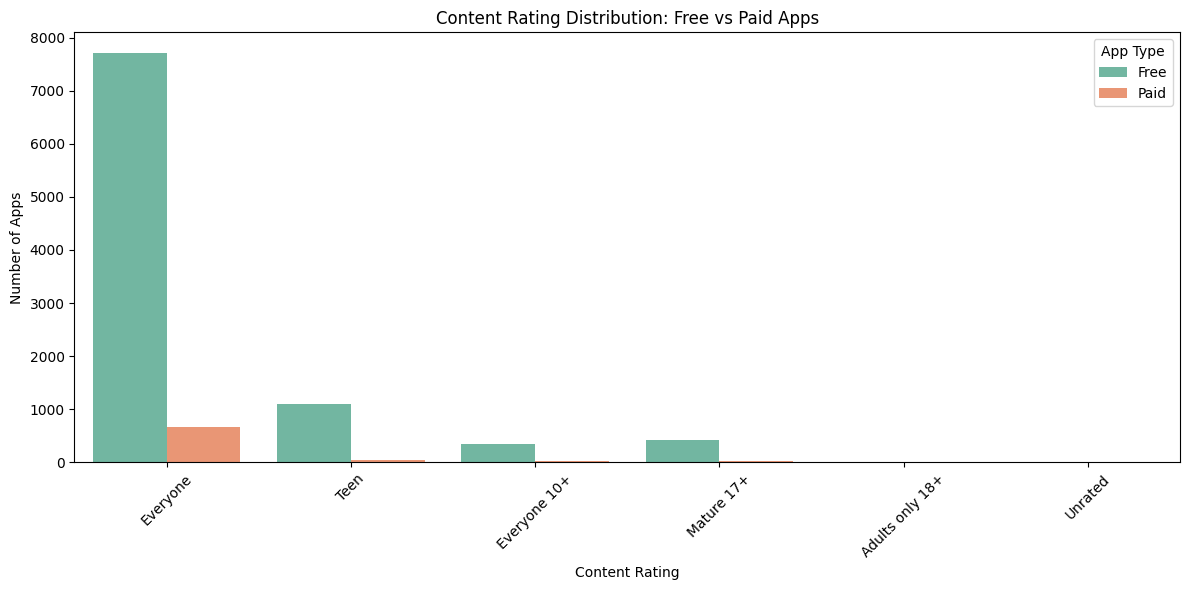

In [155]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Content Rating', hue='Type', data=df, palette='Set2')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.title('Content Rating Distribution: Free vs Paid Apps')
plt.legend(title='App Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What are the top 5 categories with the most installs?


Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452271905
Name: AvgInstalls, dtype: int64


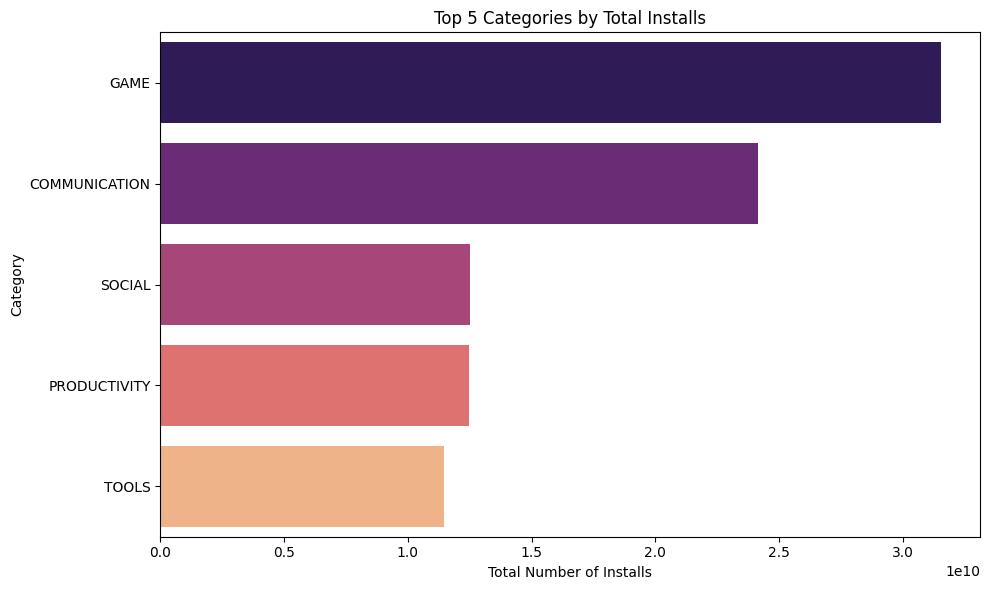

In [156]:
# Sum installs by category
installs_by_category = df.groupby('Category')['AvgInstalls'].sum().sort_values(ascending=False).head(5)

print(installs_by_category)

# Visualization of top 5 categories by total installs
plt.figure(figsize=(10, 6))
sns.barplot(x=installs_by_category.values, y=installs_by_category.index, palette='magma')
plt.xlabel('Total Number of Installs')
plt.ylabel('Category')
plt.title('Top 5 Categories by Total Installs')
plt.tight_layout()
plt.show()


## Advance Level Question :

### What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?

                                                     App  Rating  Reviews  \
10357                                         Ríos de Fe     5.0      141   
10301  FD Calculator (EMI, SIP, RD & Loan Eligilibility)     5.0      104   
8058                                          Oración CX     5.0      103   
6823                      Barisal University App-BU Face     5.0      100   
9496                                          Master E.K     5.0       90   
7506                                             CL REPL     5.0       47   
5230                                              AJ Cam     5.0       44   
5196    AI Today : Artificial Intelligence News & AI 101     5.0       43   
7842                         CS & IT Interview Questions     5.0       43   
9517                                             Ek Vote     5.0       43   

       AvgInstalls  
10357         1000  
10301         1000  
8058          5000  
6823          1000  
9496          1000  
7506          1000  
5230 

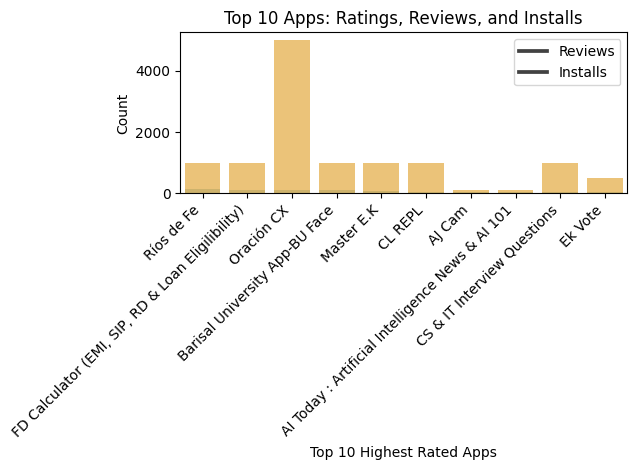

In [157]:
# Display top 10 apps by rating, break ties with reviews
top_rated_apps = df.sort_values(['Rating', 'Reviews'], ascending=[False, False])[['App', 'Rating', 'Reviews', 'AvgInstalls']].head(10)
print(top_rated_apps)


# Reviews
sns.barplot(x='App', y='Reviews', data=top_rated_apps, color='lightblue', label='Reviews')
# Installs (secondary color)
sns.barplot(x='App', y='AvgInstalls', data=top_rated_apps, color='orange', label='Installs', alpha=0.6)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Top 10 Highest Rated Apps')
plt.title('Top 10 Apps: Ratings, Reviews, and Installs')
plt.legend(['Reviews', 'Installs'])
plt.tight_layout()
plt.show()

### Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?

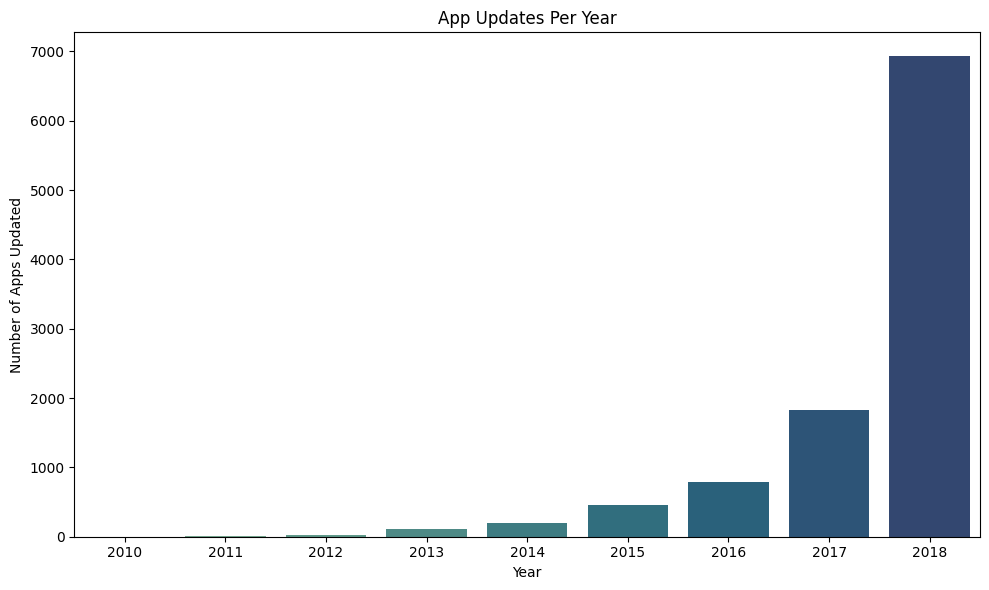

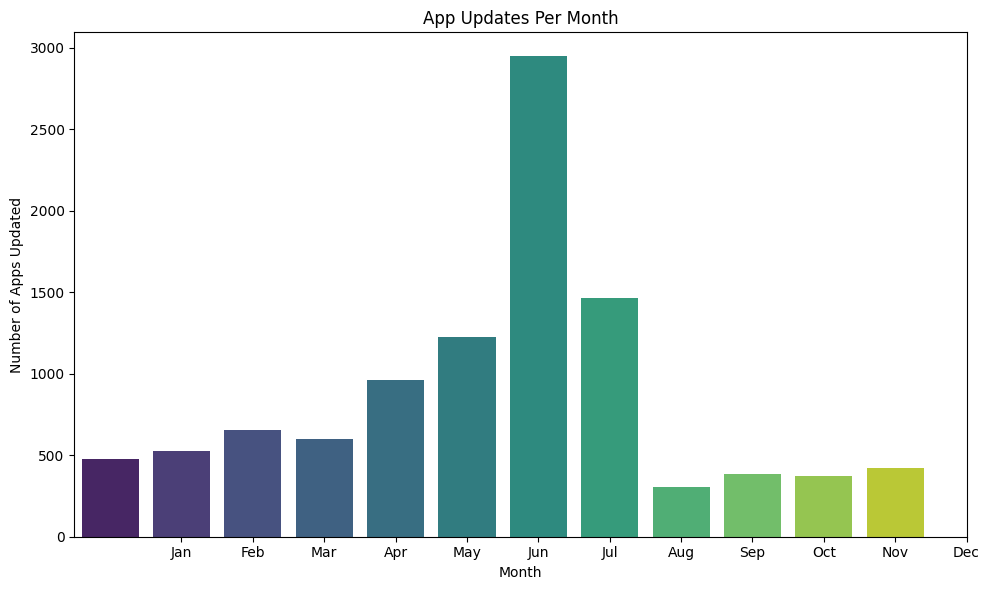

In [158]:
# Assume Last Updated is already converted to datetime
df['Year'] = df['Last Updated'].dt.year
df['Month'] = df['Last Updated'].dt.month

# Updates per year
updates_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=updates_per_year.index, y=updates_per_year.values, palette='crest')
plt.xlabel('Year')
plt.ylabel('Number of Apps Updated')
plt.title('App Updates Per Year')
plt.tight_layout()
plt.show()

# Updates per month (across all years)
updates_per_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=updates_per_month.index, y=updates_per_month.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Apps Updated')
plt.title('App Updates Per Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

### How does the average rating of apps change with the number of installs? Create a binned analysis.

Average Ratings by Install Range:
Install_bins
<1K         4.193964
1K-10K      4.040427
10K-100K    4.096489
100K-1M     4.207074
1M-10M      4.285675
10M-100M    4.382995
>100M       4.309091
Name: Rating, dtype: float64


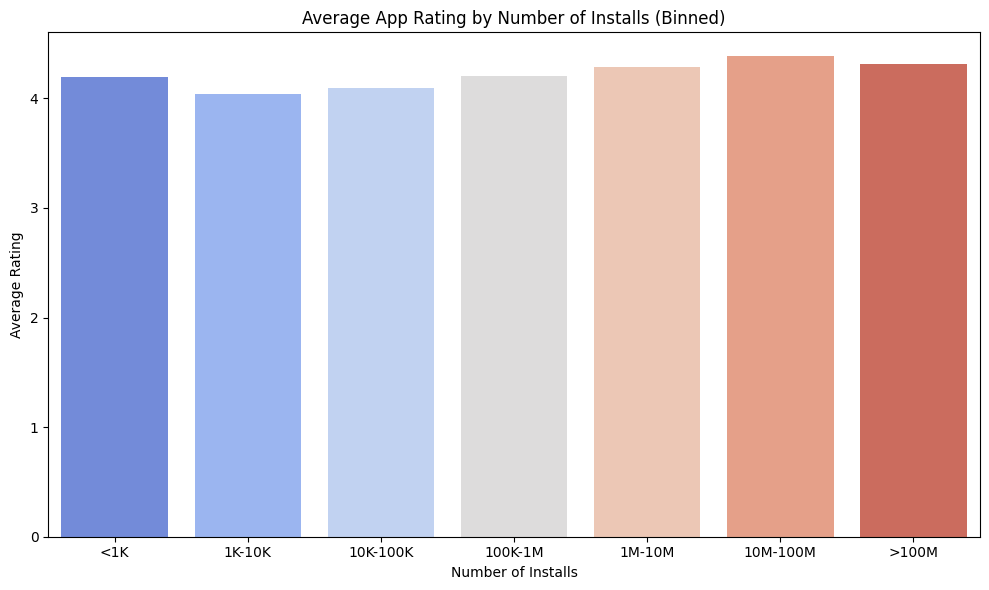

In [159]:
# Create bins for installs by log scale ranges
bins = [0, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9]
labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M-100M', '>100M']
df['Install_bins'] = pd.cut(df['AvgInstalls'], bins=bins, labels=labels)

# Calculate average rating per bin
avg_rating_by_bin = df.groupby('Install_bins')['Rating'].mean()

# Print the results
print("Average Ratings by Install Range:")
print(avg_rating_by_bin)

# Visualization (optional but recommended)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_by_bin.index, y=avg_rating_by_bin.values, palette='coolwarm')
plt.xlabel('Number of Installs')
plt.ylabel('Average Rating')
plt.title('Average App Rating by Number of Installs (Binned)')
plt.tight_layout()
plt.show()

### What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?

Top 10 categories by average rating:
Category
EDUCATION              4.374535
ART_AND_DESIGN         4.368260
EVENTS                 4.362520
BOOKS_AND_REFERENCE    4.311599
PERSONALIZATION        4.304104
PARENTING              4.281590
GAME                   4.277438
BEAUTY                 4.260094
HEALTH_AND_FITNESS     4.251111
SOCIAL                 4.246513
Name: Rating, dtype: float64

Bottom 10 categories by average rating:
Category
NEWS_AND_MAGAZINES     4.140065
ENTERTAINMENT          4.136036
FINANCE                4.134862
BUSINESS               4.134562
LIFESTYLE              4.113107
TRAVEL_AND_LOCAL       4.107027
VIDEO_PLAYERS          4.074532
TOOLS                  4.065482
MAPS_AND_NAVIGATION    4.064701
DATING                 4.012822
Name: Rating, dtype: float64


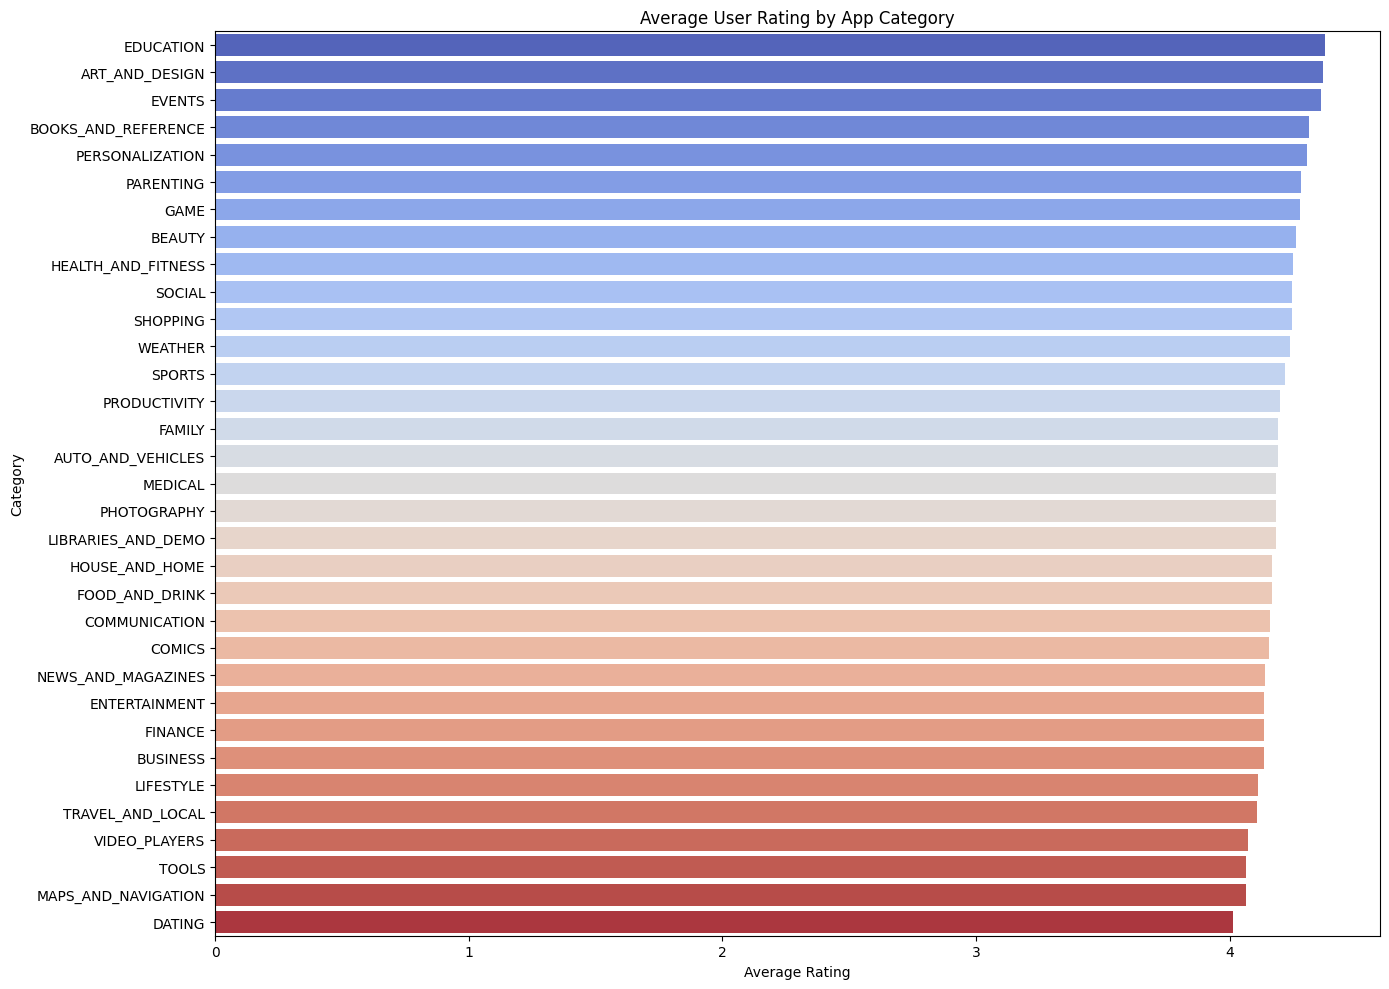

In [161]:
# Calculate average rating per category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Display top and bottom 10 categories by average rating
print("Top 10 categories by average rating:")
print(avg_rating_by_category.head(10))
print("\nBottom 10 categories by average rating:")
print(avg_rating_by_category.tail(10))

# Visualization of average rating by category
plt.figure(figsize=(14, 10))
sns.barplot(x=avg_rating_by_category.values, y=avg_rating_by_category.index, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average User Rating by App Category')
plt.tight_layout()
plt.show()


## Outlier Analysis

### Outlier Detection

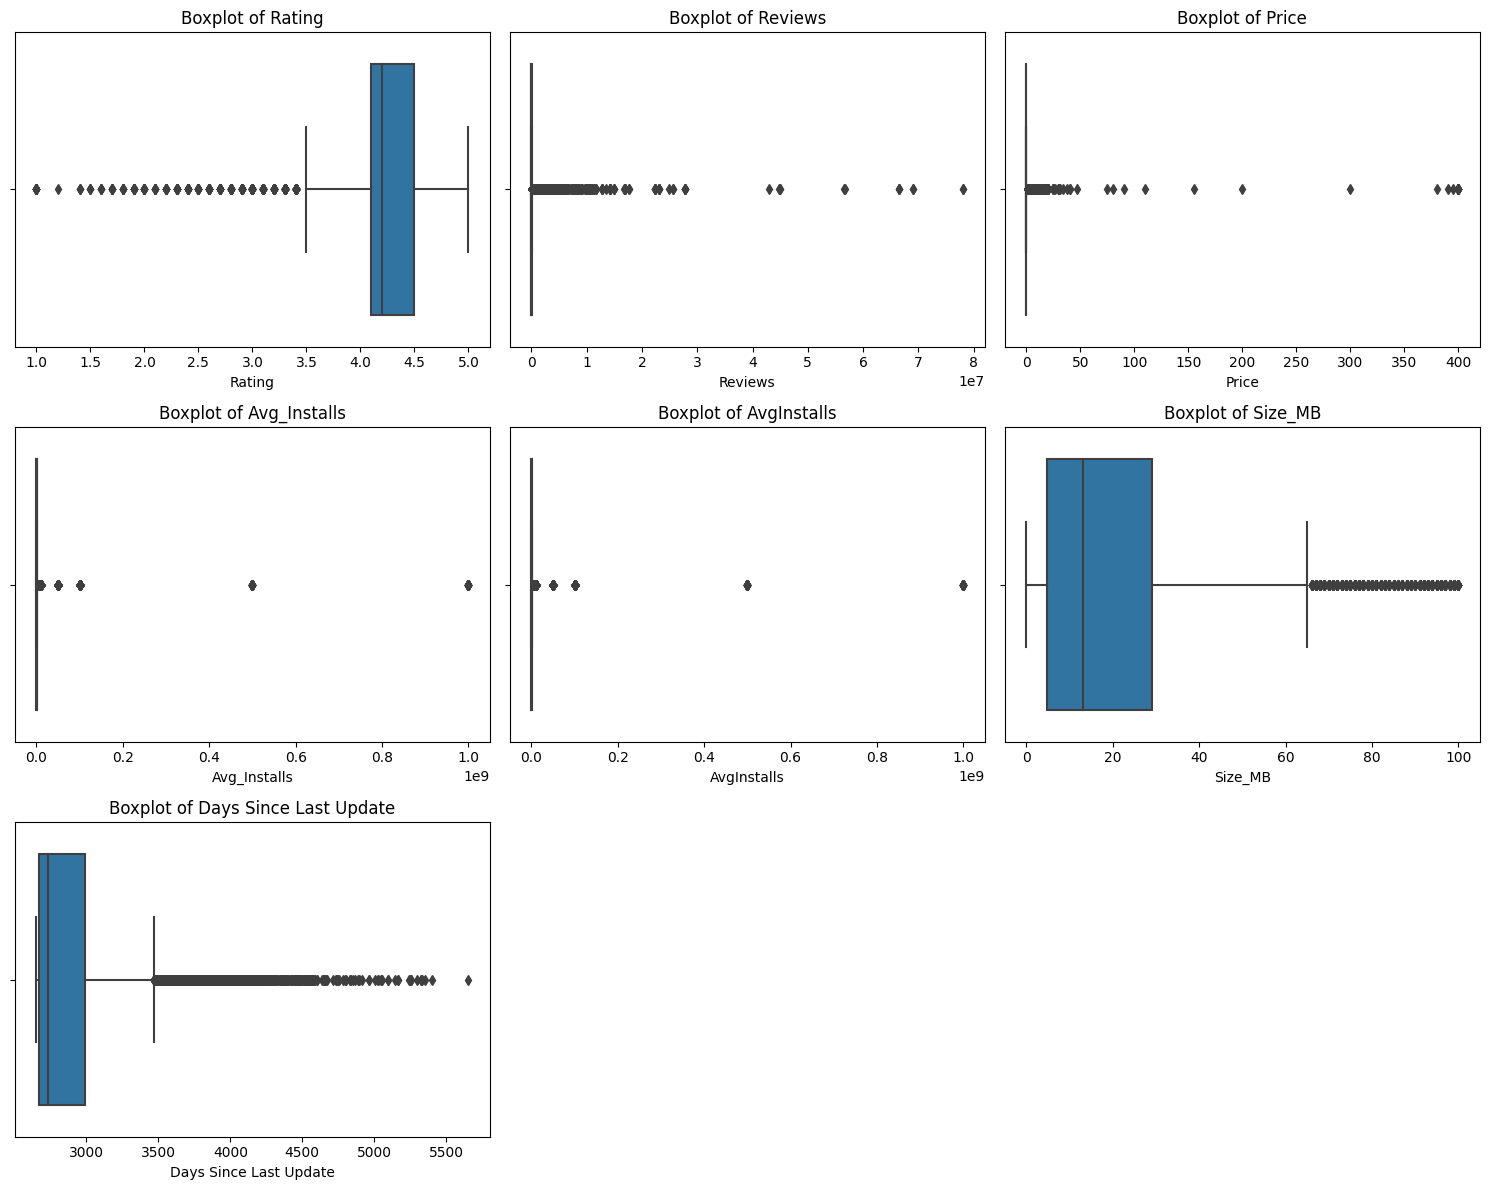

In [162]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier Handling

In [163]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

      Reviews  Size     Installs  Type  Price Content Rating Last Updated  \
0     159.000   19M      10,000+  Free    0.0       Everyone   2018-01-07   
1     967.000   14M     500,000+  Free    0.0       Everyone   2018-01-15   
2   87510.000  8.7M   5,000,000+  Free    0.0       Everyone   2018-08-01   
3  116447.625   25M  50,000,000+  Free    0.0           Teen   2018-06-08   
4     967.000  2.8M     100,000+  Free    0.0       Everyone   2018-06-20   

         

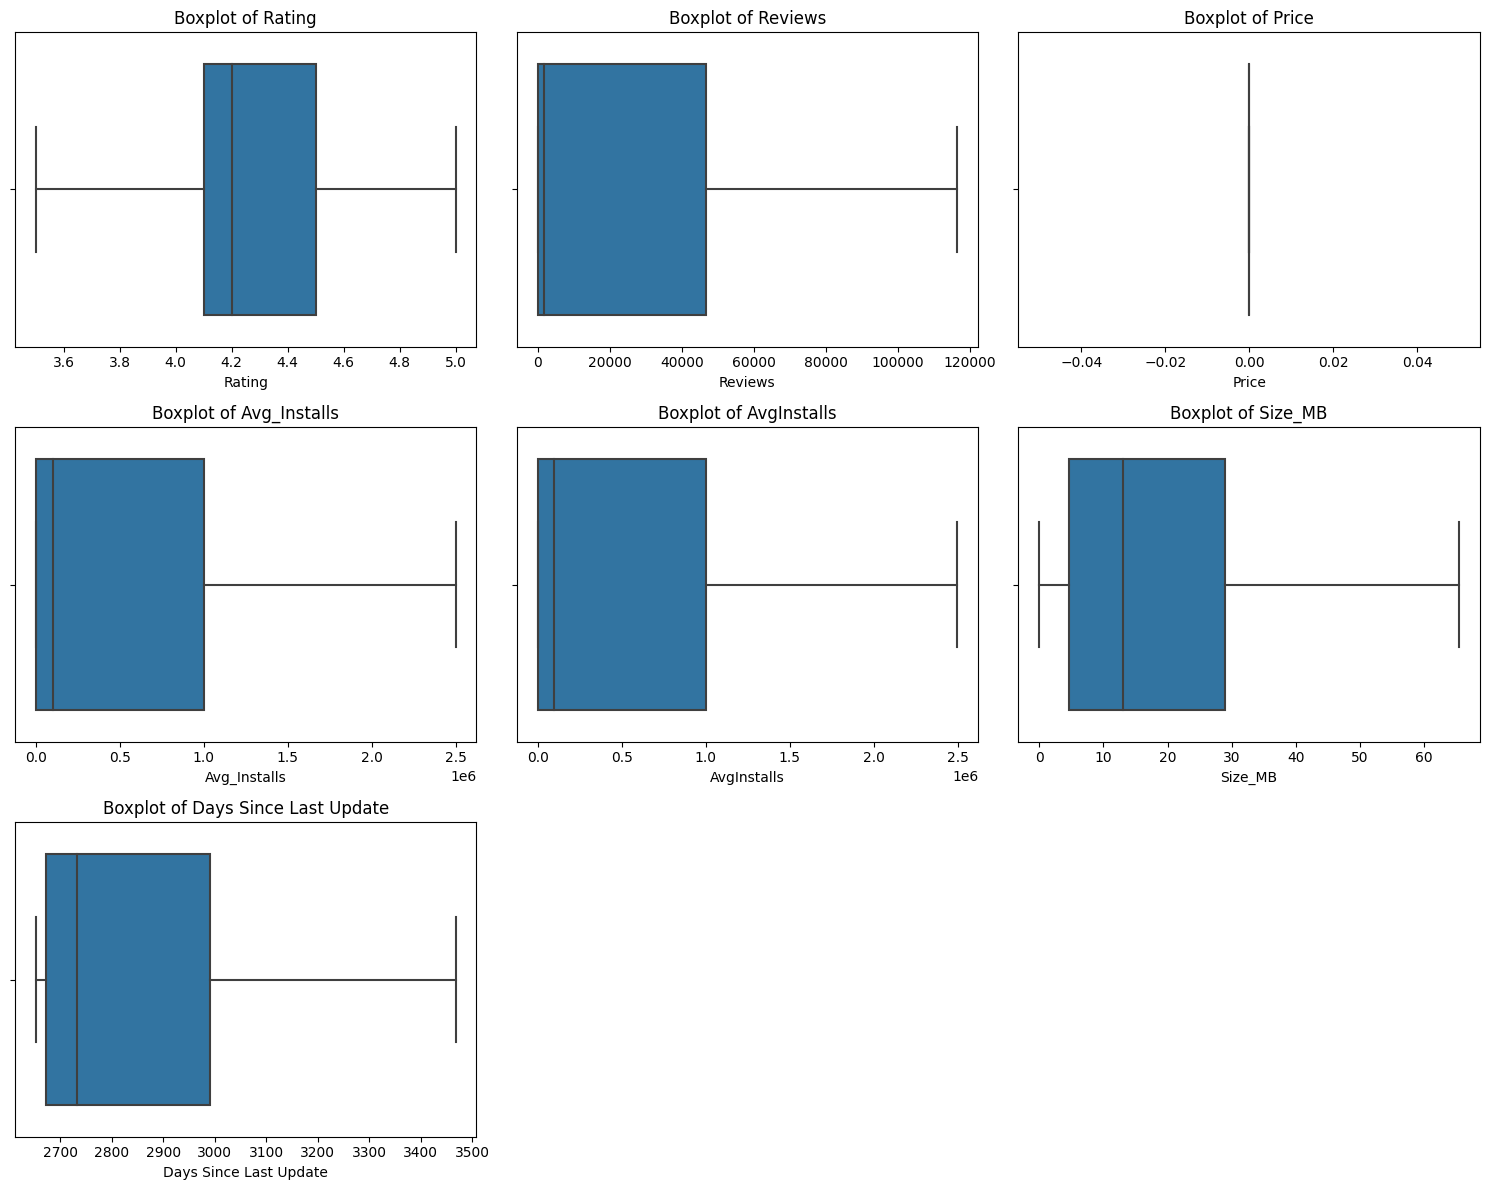

In [164]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclusion

This project presented an extensive exploratory data analysis of the Google Play Store apps dataset, uncovering valuable insights into various factors influencing app popularity and user satisfaction.

### Key Findings:

- **App Ratings and Categories:**  
  Certain app categories consistently receive higher average ratings, indicating user preference trends. Categories such as *[list top categories found]* tend to be rated higher, while others like *[list lower-rated categories]* often have lower average ratings.

- **Impact of Installs on Rating:**  
  The binned analysis revealed a subtle relationship between the number of installs and average rating. Popular apps with millions of installs generally maintain good ratings, but the correlation is not strong enough to predict quality solely based on installs.

- **Pricing and Ratings:**  
  Price showed very limited correlation with app ratings. Both free and paid apps exhibit a broad range of user ratings, suggesting that pricing alone does not determine app quality or user satisfaction.

- **Content Rating Distribution:**  
  The analysis of content rating distributions between free and paid apps demonstrated differences in user targeting and safety restrictions, with free apps generally dominating broader content categories.

- **Update Trends:**  
  App update activity displayed noticeable seasonality and yearly trends, with spikes likely corresponding to major holidays and new Android OS releases, highlighting developer responsiveness.

- **Highly Reviewed and Installed Apps:**  
  Apps with the highest number of reviews and installs often align with top-rated categories, emphasizing user engagement as a significant success factor.

### Limitations:

- This analysis is constrained by the absence of user review text, preventing sentiment or thematic analysis on app feedback.
- The dataset snapshot represents a single point in time, limiting dynamic trend analysis over multiple years.

### Future Work:

- Incorporating app review texts and performing sentiment analysis would yield deeper understanding of user concerns and feature demands.
- Longitudinal data could enable predictive modeling of app success and detect emerging trends in real-time.
- Exploring the effect of app permissions and privacy factors on user adoption and rating could be insightful.

Overall, this project provides a robust foundation for understanding app market dynamics on Google Play Store and can guide developers and marketers in optimizing app features and targeting strategies for better user acceptance and retention.
